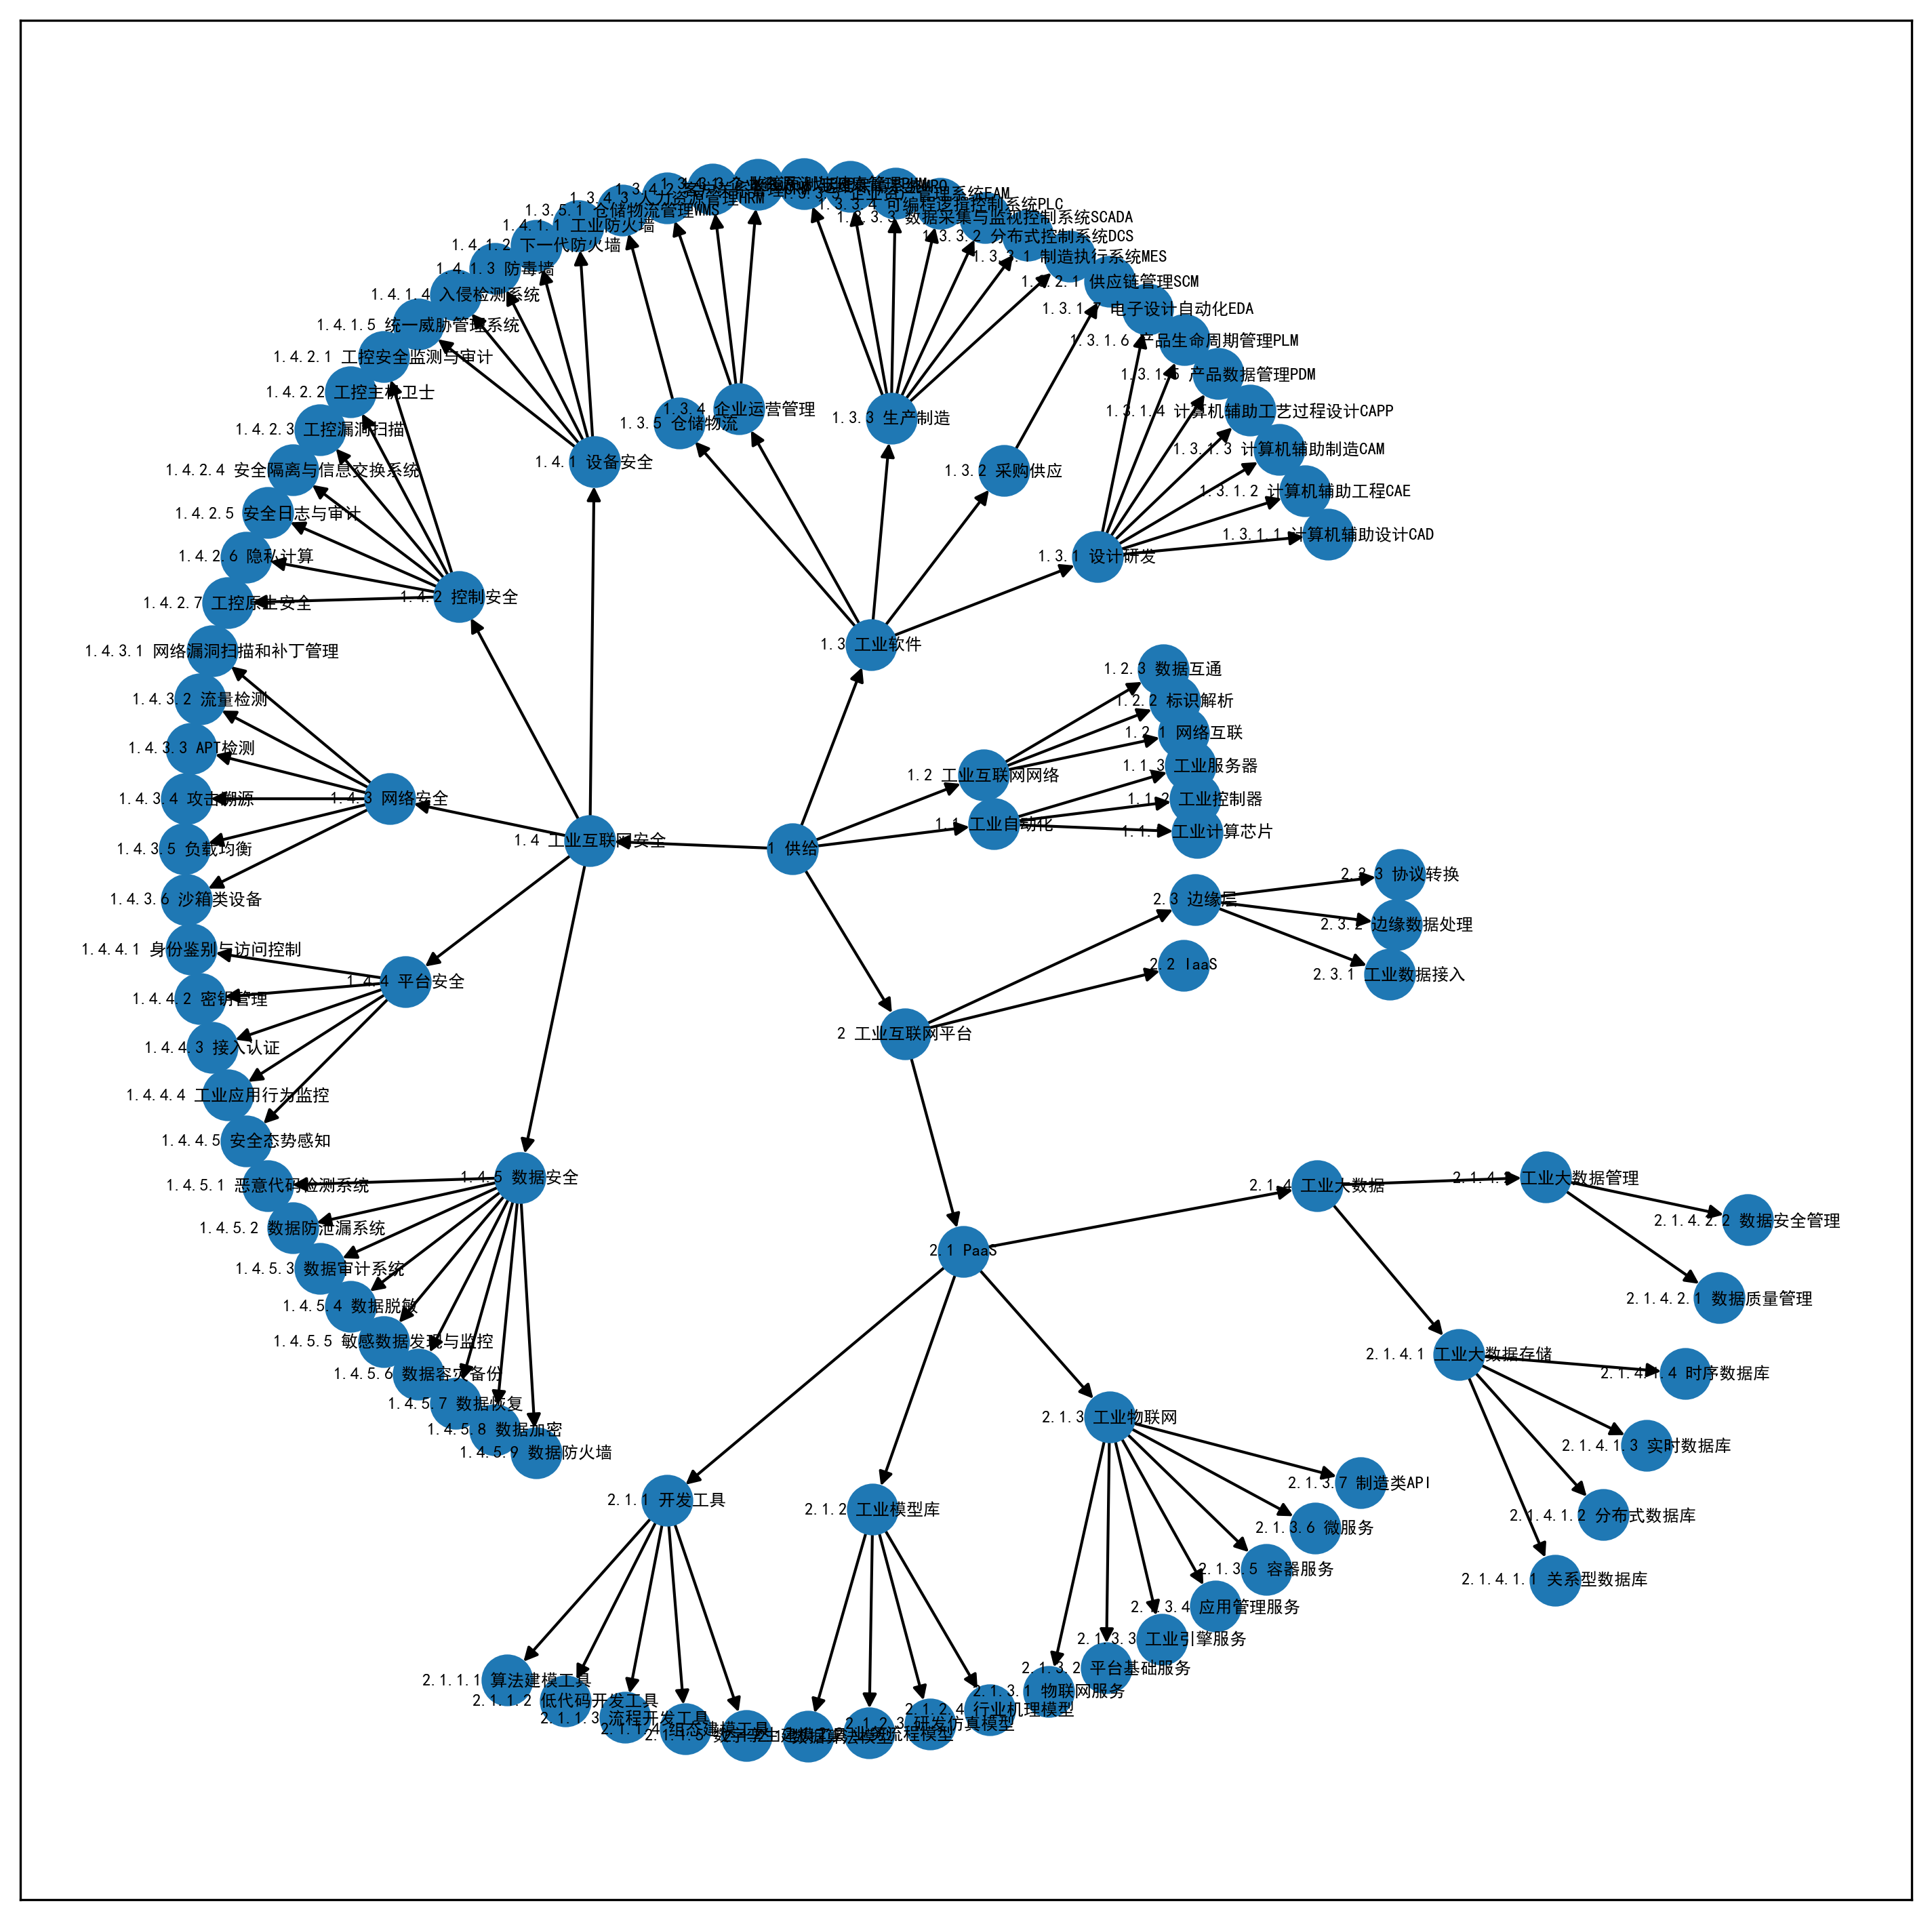

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'

BomNodes = pd.read_csv('BomNodes.csv', index_col=0)
BomNodes.set_index('Code', inplace=True)
BomCateNet = pd.read_csv('BomCateNet.csv', index_col=0)
BomCateNet.fillna(0, inplace=True)

G = nx.from_pandas_adjacency(BomCateNet, create_using=nx.MultiDiGraph())

labels_dict = {}
for code in G.nodes:
    labels_dict[code] = BomNodes.loc[code].to_dict()
nx.set_node_attributes(G, labels_dict)

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")
temp = {}
for key, value in nx.get_node_attributes(G, 'Name').items():
    temp[key] = key + " "+ value
node_labels = temp
plt.figure(figsize=(12, 12), dpi=300)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels = node_labels, font_size=6)
plt.show()


In [75]:
dict_nodes = {0: sorted([node for node in G.nodes() if G.out_degree(node)==0])}
level = 1
while True:
    nodes = [list(G.predecessors(node)) for node in dict_nodes[level-1]]
    nodes = sorted(list(set([i for j in nodes for i in j])))
    if nodes:
        dict_nodes[level] = nodes
        level += 1
    else:
        break

Firm = pd.read_csv("Firm.csv")
Firm.fillna(0, inplace=True)
Firm_copy = Firm.copy()

for tier in list(dict_nodes.keys())[1:]:
    for node in dict_nodes[tier]:
        list_neighbors = list(G.neighbors(node))
        firm_list = Firm_copy.index[(Firm_copy[list_neighbors]==1).all(axis=1)].to_list()
        if firm_list:
            Firm_copy.loc[firm_list, node] = 1
            Firm_copy.loc[firm_list, list_neighbors] = 0
Firm_copy.to_csv('Firm_amended.csv', index=False, encoding='utf-8-sig')

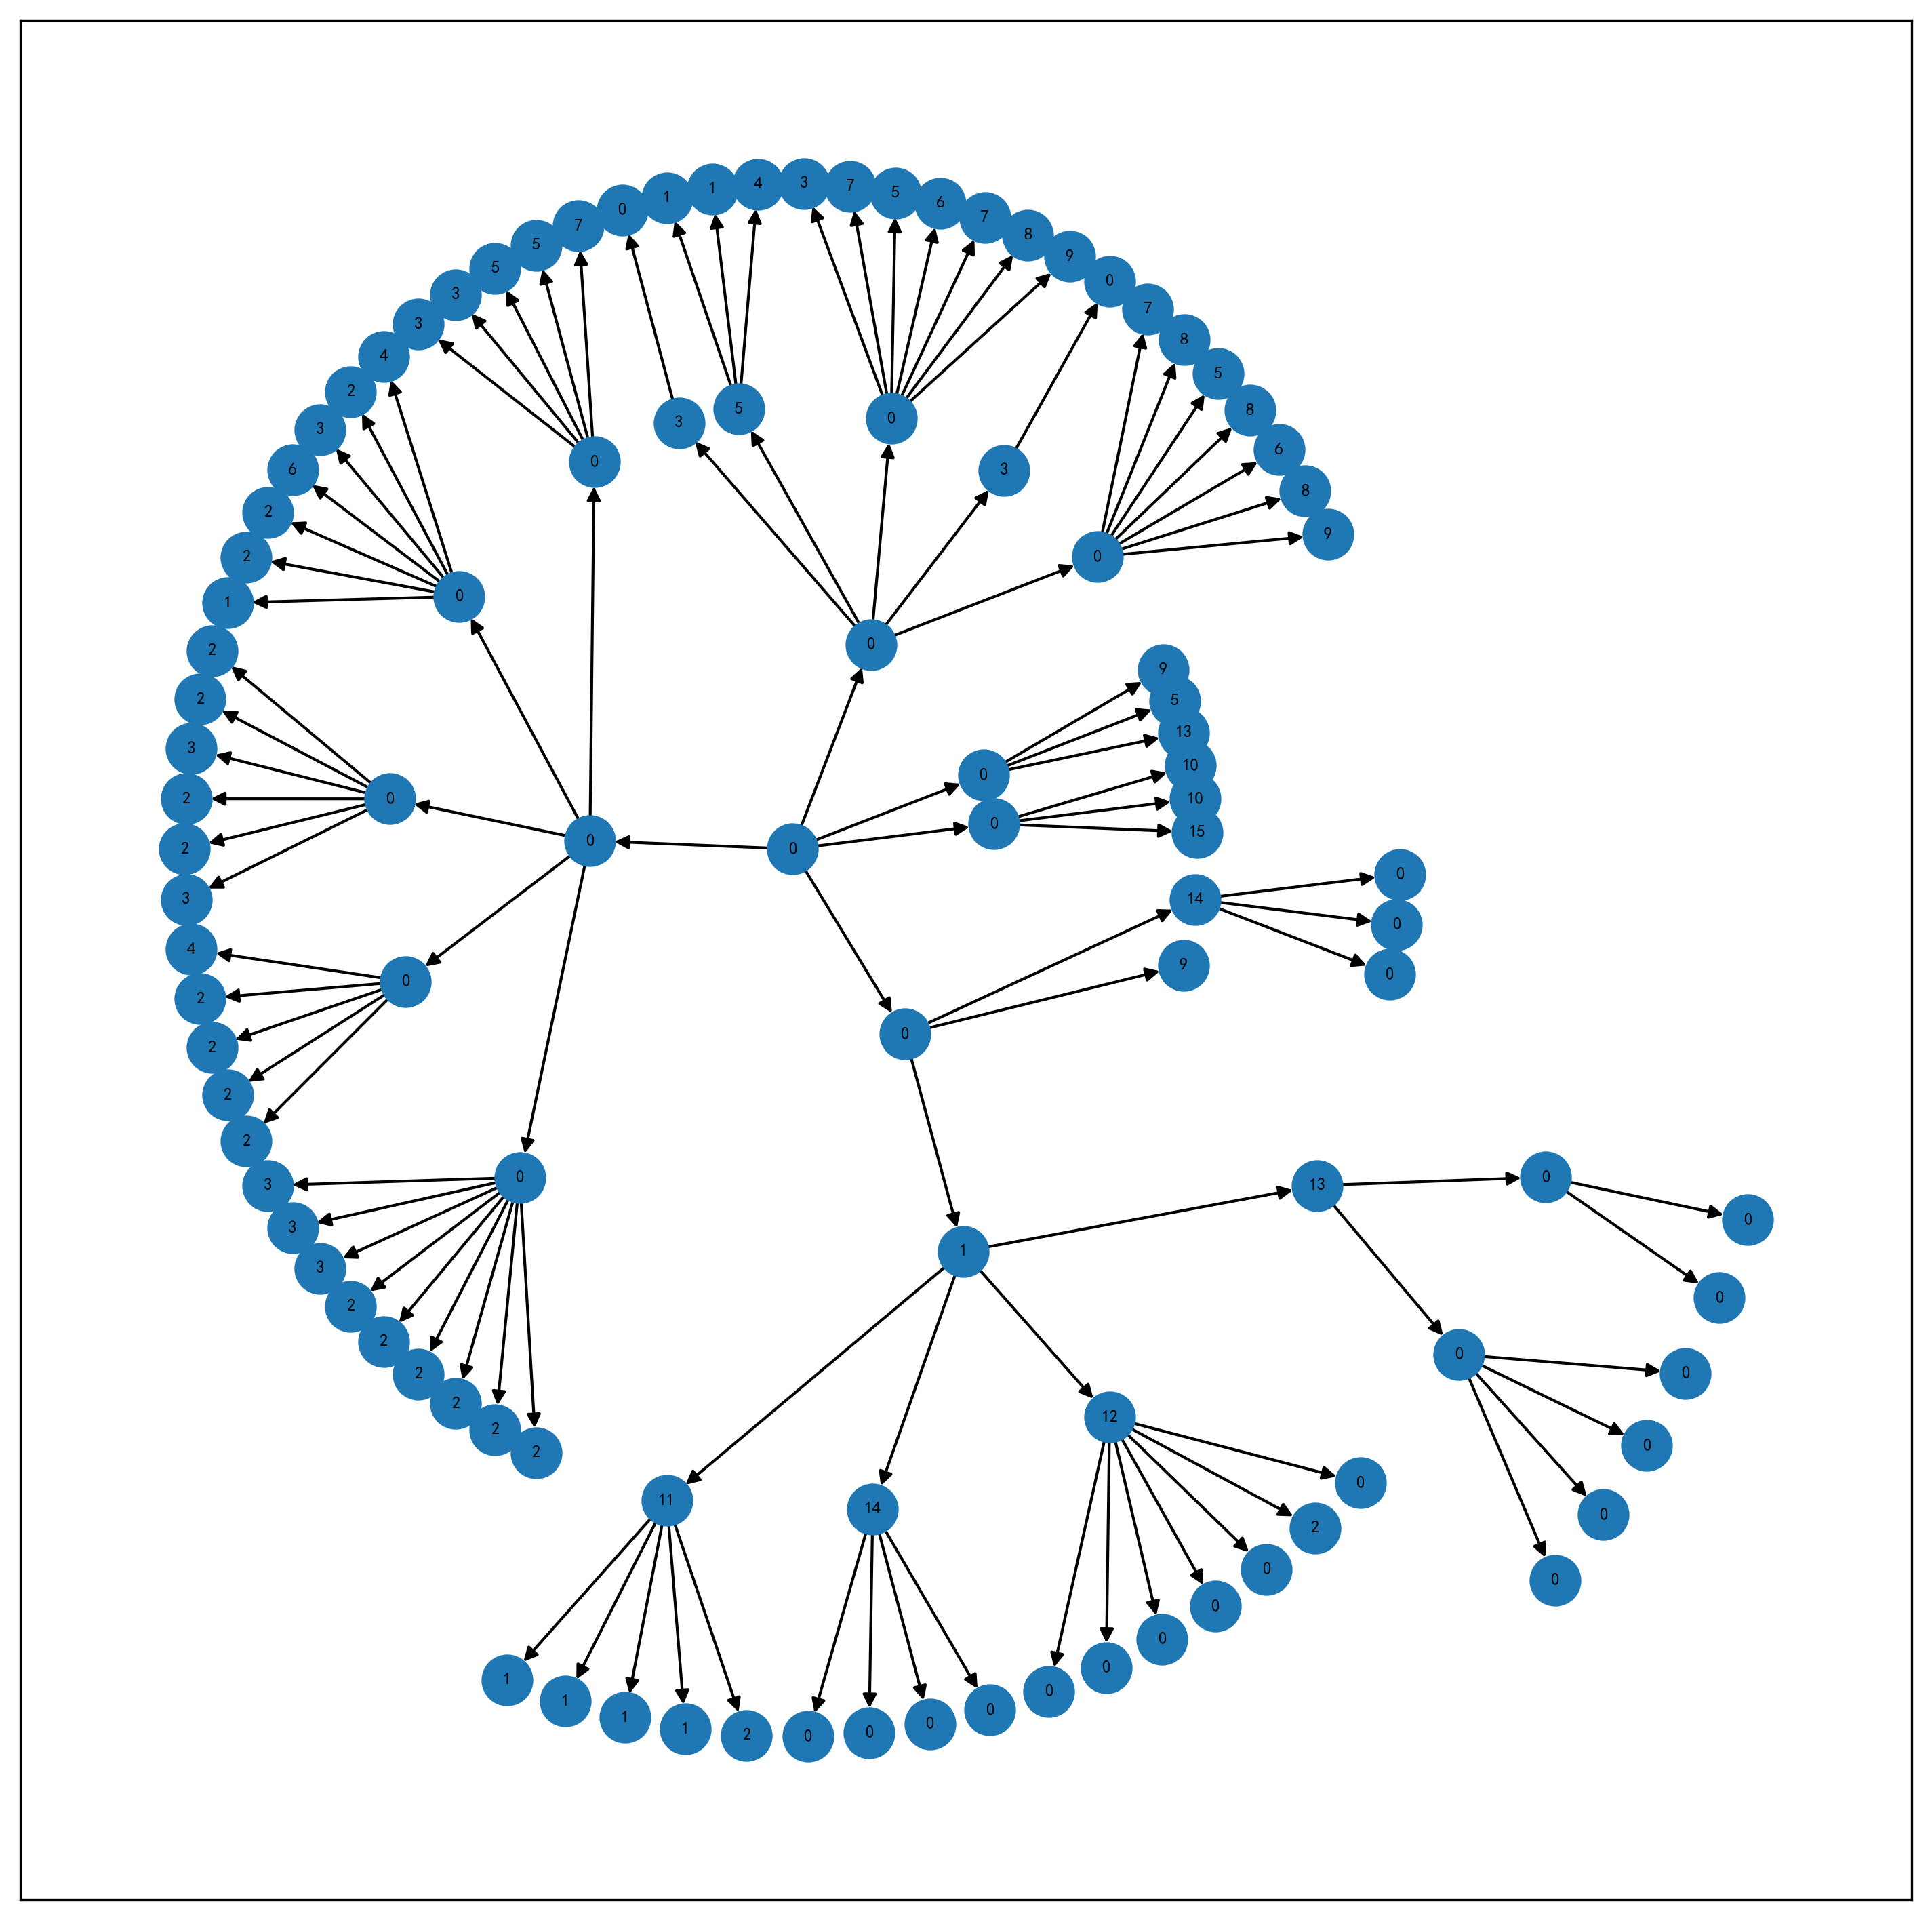

In [89]:
firm_num_dict = {}
for node in nx.nodes(G):
    firm_num_dict[node]= sum(Firm_copy[node]==1)
nx.set_node_attributes(G, firm_num_dict, name="Num_Firm")

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")
temp = {}
for key, value in nx.get_node_attributes(G, 'Num_Firm').items():
    # temp[key] = key + " "+ str(value)
    temp[key] = str(value)
node_labels = temp
plt.figure(figsize=(12, 12), dpi=300)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels = node_labels, font_size=6)
plt.show()

In [71]:
list(dict_nodes.keys())[1:]

[1, 2, 3, 4, 5]